In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [2]:
sns.set()

## Read in data and EDA

In [3]:
df = pd.read_csv("data/creditcard.csv")

#### EDA on training set

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

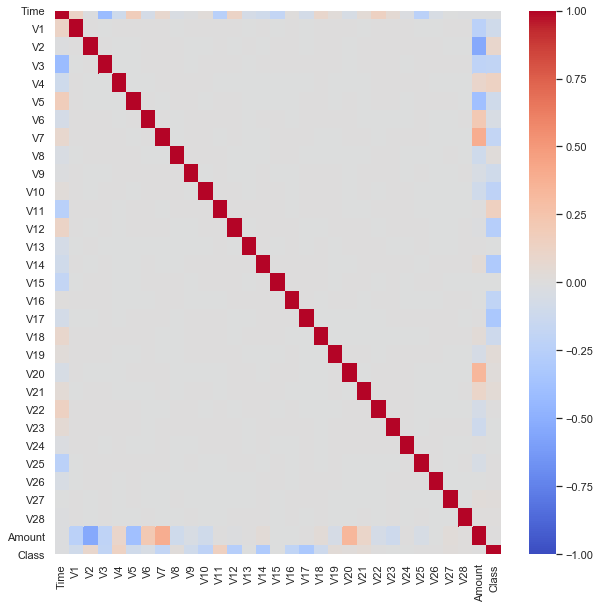

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="coolwarm", vmin=-1, vmax=1)

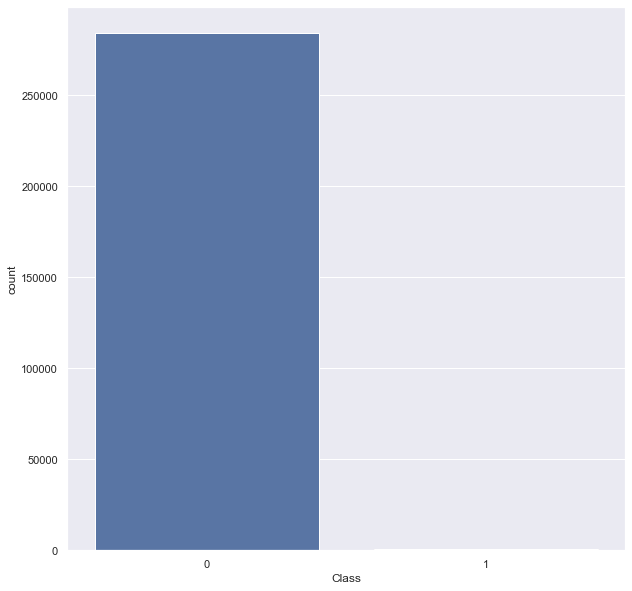

In [17]:
plt.figure(figsize=(10,10))
sns.countplot(x="Class", data=df)

> Severe class imbalance. anomalies are very rare

In [19]:
print("Anomalies are {:.3f} % of the data".format(np.mean(df["Class"] == 1)*100))

Anomalies are 0.173 % of the data


## Fraud detection models

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["Class"]),
                                                    df["Class"], test_size=0.3, 
                                                    random_state=42)

#### Dummy classifeier - Baseline

In [41]:
from sklearn.dummy import DummyClassifier

In [43]:
baseline_model = DummyClassifier("prior").fit(X_train, y_train)

In [44]:
baseline_model.score(X_test, y_test)

0.9984082955888721

In [46]:
print(classification_report(y_test, baseline_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



C:\Users\muham\Anaconda3\envs\tf_gpu\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Unable to classify the fraud class

## Logistic regression classifier

In [47]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr_model = LogisticRegression(max_iter=2500).fit(X_train, y_train)

In [50]:
lr_model.score(X_test, y_test)

0.9991573329588147

In [51]:
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.81      0.61      0.70       136

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [56]:
pd.DataFrame(confusion_matrix(y_test, lr_model.predict(X_test)))

,0,1
0,85288,19
1,53,83


In [57]:
from imblearn.over_sampling import SMOTE

In [59]:
sm = SMOTE()
X_syn, y_syn = sm.fit_resample(X_train, y_train)

In [68]:
lr_model = LogisticRegression(max_iter=2500).fit(X_syn, y_syn)

In [69]:
print(classification_report(y_test, lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.08      0.91      0.14       136

    accuracy                           0.98     85443
   macro avg       0.54      0.95      0.57     85443
weighted avg       1.00      0.98      0.99     85443



In [70]:
pd.DataFrame(confusion_matrix(y_test, lr_model.predict(X_test)))

,0,1
0,83837,1470
1,12,124


> This one misclassifies a lot of the non fraud cases as fraud cases. Could be costly.

## Deep Auto-Encoders

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

> We will only use the class 0 for reconstruction

#### normalize data first

In [103]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [48]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [104]:
mms = MinMaxScaler()
X_train_scaled = pd.DataFrame(mms.fit_transform(X_train),
                             columns = X_train.columns,
                             index = X_train.index)
X_test_scaled = pd.DataFrame(mms.transform(X_test),
                            columns = X_test.columns,
                            index = X_test.index)

In [73]:
# sc = StandardScaler()
# X_train_scaled.loc[:, ["Time", "Amount"]] = sc.fit_transform(X_train.loc[:, ["Time", "Amount"]])
# X_test_scaled.loc[:, ["Time", "Amount"]] = sc.transform(X_test.loc[:, ["Time", "Amount"]])

####  Creating a 30 - 15 - 5 - 15 - 30 architecture

In [118]:
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(15, activation='relu')(input_layer)
encoded = Dense(5, activation='relu')(encoded)
decoded = Dense(15, activation='relu')(encoded)
decoded = Dense(X_train.shape[1], activation='sigmoid')(decoded)

#### create an autoencoder model

In [119]:
autoencoder = Model(input_layer, decoded)

In [120]:
autoencoder.compile(optimizer='adadelta', 
                    loss='binary_crossentropy')

In [121]:
import os
import time

In [122]:
# code in this cell taken from [1]
root_logdir = os.path.join(os.curdir, "logs")
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

checkpoint_cb = ModelCheckpoint("deep_AA_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=5, restore_best_weights=True)
tensorboard_cb = TensorBoard(run_logdir)

In [123]:
batch_size = 128
epochs = 50
history = autoencoder.fit(X_train_scaled[y_train==0].values, 
                          X_train_scaled[y_train==0].values,
                          epochs=epochs,
                          batch_size=batch_size,
                          validation_data=(X_test_scaled[y_test==0].values,
                                           X_test_scaled[y_test==0].values),
                          callbacks=[checkpoint_cb,
                                     early_stopping_cb,
                                     tensorboard_cb],
                          verbose=1)

Train on 199008 samples, validate on 85307 samples
Epoch 1/50
199008/199008 [==============================] - 6s 33us/sample - loss: 0.7058 - accuracy: 2.1038e-04 - val_loss: 0.7033 - val_accuracy: 2.2038e-04
Epoch 2/50
199008/199008 [==============================] - 6s 29us/sample - loss: 0.7006 - accuracy: 2.1038e-04 - val_loss: 0.6981 - val_accuracy: 2.2038e-04
Epoch 3/50
199008/199008 [==============================] - 7s 33us/sample - loss: 0.6958 - accuracy: 2.1054e-04 - val_loss: 0.6936 - val_accuracy: 2.2038e-04
Epoch 4/50
199008/199008 [==============================] - 6s 29us/sample - loss: 0.6917 - accuracy: 2.1088e-04 - val_loss: 0.6900 - val_accuracy: 2.2038e-04
Epoch 5/50
199008/199008 [==============================] - 6s 32us/sample - loss: 0.6884 - accuracy: 2.1054e-04 - val_loss: 0.6868 - val_accuracy: 2.2038e-04
Epoch 6/50
199008/199008 [==============================] - 6s 31us/sample - loss: 0.6854 - accuracy: 2.1038e-04 - val_loss: 0.6839 - val_accuracy: 2.2038

In [8]:
# deep_AA_model = tf.keras.models.load_model("deep_AA_model.h5")

In [213]:
def rmse(X_true, X_pred):
    se = np.power(X_true - X_pred, 2)
    rmse_array = np.mean(se, axis = 1)
    return rmse_array

In [214]:
non_fraud_rmse = rmse(X_train_scaled[y_train==0].values, autoencoder.predict(X_train_scaled[y_train==0].values))

In [216]:
fraud_rmse = rmse(X_train_scaled[y_train==1].values, autoencoder.predict(X_train_scaled[y_train==1].values))

In [217]:
rmse_thresh = np.quantile(non_fraud_rmse, .90)

In [218]:
rmse_thresh

0.007033124944858677

In [196]:
X_predictions = autoencoder.predict(X_test_scaled.values)

In [219]:
rmse_preds = rmse(X_test_scaled.values, X_predictions)

In [223]:
print(classification_report(y_test, rmse_preds>rmse_thresh))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     85307
           1       0.01      0.79      0.02       136

    accuracy                           0.90     85443
   macro avg       0.51      0.85      0.49     85443
weighted avg       1.00      0.90      0.95     85443



## Autoencoders with H2O

In [232]:
import h2o

## Isolation forest

In [233]:
from sklearn.ensemble import IsolationForest

In [237]:
isf_model = IsolationForest()
isf_model.fit(X_train)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=None, verbose=0, warm_start=False)

In [241]:
df_res_isf = pd.DataFrame(isf_model.predict(X_test), columns=["Class"])

In [244]:
df_res_isf["Class"] = df_res_isf["Class"].apply(lambda x: 1 if x == -1 else 0)

In [245]:
print(classification_report(y_test, df_res_isf["Class"].values))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85307
           1       0.03      0.82      0.07       136

    accuracy                           0.96     85443
   macro avg       0.52      0.89      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [246]:
print(confusion_matrix(y_test, df_res_isf["Class"].values))

[[82140  3167]
 [   24   112]]


## References

[1] [*Hands-On Machine Learning with Scikit-Learn, Keras & Tensorflow* by Aurelien Geron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)